In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import f_oneway
import warnings

In [2]:
internet = pd.read_csv('Internet-Demographic.csv')

In [3]:
internet

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income
...,...,...,...,...,...
190,"Yemen, Rep.",YEM,32.947,20.0,Lower middle income
191,South Africa,ZAF,20.850,46.5,Upper middle income
192,"Congo, Dem. Rep.",COD,42.394,2.2,Low income
193,Zambia,ZMB,40.471,15.4,Lower middle income


In [4]:
internet.dtypes

Country Name       object
Country Code       object
Birth rate        float64
Internet users    float64
Income Group       object
dtype: object

In [5]:
internet['Country Name'] = internet['Country Name'].astype('category')
internet['Country Code'] = internet['Country Code'].astype('category')
internet['Income Group'] = internet['Income Group'].astype('category')

In [6]:
internet.dtypes

Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

In [7]:
internet.drop(columns = 'Country Code', inplace = True)

<h1>Task 1: Histogram of Birth Rates</h1>

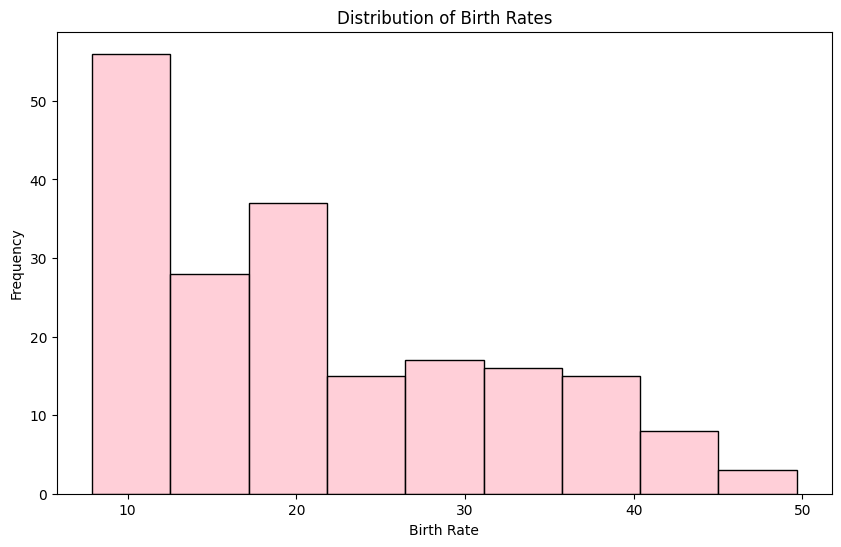

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(internet['Birth rate'], color='pink')
plt.title('Distribution of Birth Rates')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.show()

<h1>Task2: Top 5 Countries with Highest Internet Usage </h1>

In [9]:
highest = internet.groupby('Country Name')['Internet users'].sum().reset_index()
Topfive = highest.sort_values(by='Internet users', ascending=False).head(5)
Topfive

C:\Users\Light Micro Finance\AppData\Local\Temp\ipykernel_2812\3136321600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  highest = internet.groupby('Country Name')['Internet users'].sum().reset_index()


,Country Name,Internet users
79,Iceland,96.5468
19,Bermuda,95.3000
131,Norway,95.0534
167,Sweden,94.7836
48,Denmark,94.6297


<h2>Insights for Task 2: The top 5 country with the highest internet usage are:</h2>
<ul>
    <li>1. Iceland</li>
    <li>2. Bermuda</li>
    <li>3. Norway </li>
    <li>4. Sweden </li>
    <li>5. Denmark</li>
    
</ul>

<h1>Task 3: Count the Countries with Income Group </h1>

In [10]:
incomeGroup = internet.groupby('Country Name')['Income Group'].value_counts()
incomeGroup

C:\Users\Light Micro Finance\AppData\Local\Temp\ipykernel_2812\4141951516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  incomeGroup = internet.groupby('Country Name')['Income Group'].value_counts()


Country Name  Income Group       
Afghanistan   Low income             1
              High income            0
              Lower middle income    0
              Upper middle income    0
Albania       Upper middle income    1
                                    ..
Zambia        Upper middle income    0
Zimbabwe      Low income             1
              High income            0
              Lower middle income    0
              Upper middle income    0
Name: count, Length: 780, dtype: int64

<h1> Task 4: Box Plot of Internet Usage </h1>

In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country Name    195 non-null    category
 1   Birth rate      195 non-null    float64 
 2   Internet users  195 non-null    float64 
 3   Income Group    195 non-null    category
dtypes: category(2), float64(2)
memory usage: 9.5 KB


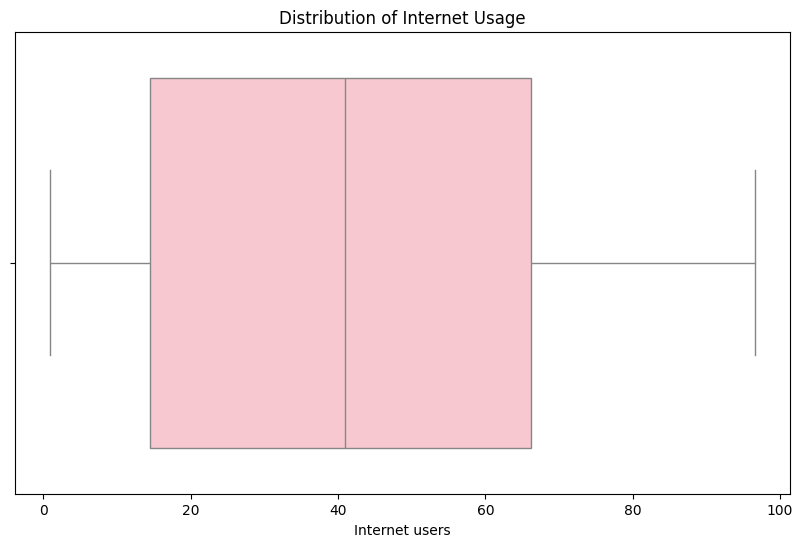

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=internet['Internet users'], color='pink')
plt.title('Distribution of Internet Usage')
plt.xlabel('Internet users')
plt.show()

<h1>Task 5: Countries with No Internet Access </h1>

In [17]:
NoInternet = internet[internet['Internet users'] == 0][['Country Name']]
NoInternet

,Country Name


<h2>Insight for Task 5: Countries with No Internet Access is none.</h2>

<h1>Task 6: Average Birth Rate </h1>

In [20]:
average = internet['Birth rate'].mean()
average

np.float64(21.469928205128202)

<h2>Insights for task 6: The average Birth Rate is 21.47</h2>

<h1>Task 7: Scatter Plot: Birth Rate vs. Internet Usage </h1>

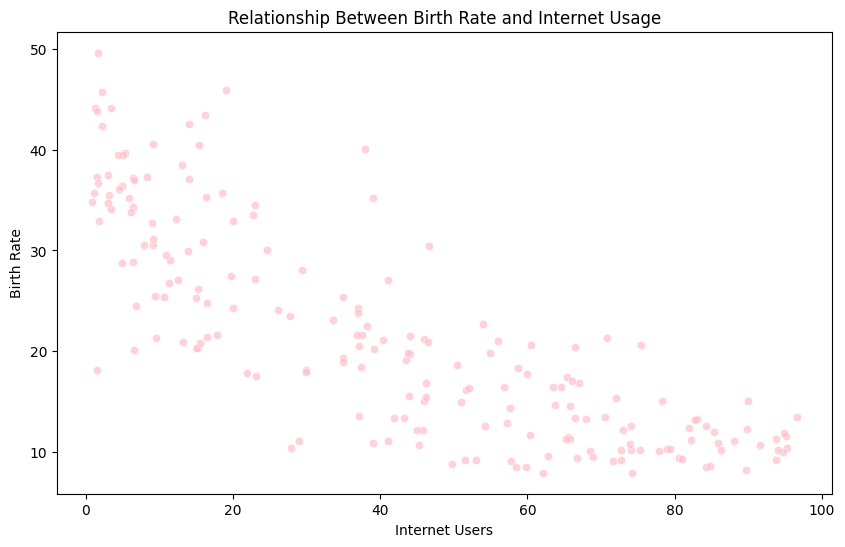

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Internet users', y='Birth rate', data=internet, alpha=0.7, color='pink')
plt.title('Relationship Between Birth Rate and Internet Usage')
plt.xlabel('Internet Users')
plt.ylabel('Birth Rate')
plt.show()

<h1>Task 8: Countries with Birth Rates Above 40 </h1>

In [25]:
highRates = internet[internet['Birth rate'] > 40]
highRates

,Country Name,Birth rate,Internet users,Income Group
2,Angola,45.985,19.1,Upper middle income
11,Burundi,44.151,1.3,Low income
14,Burkina Faso,40.551,9.1,Low income
65,"Gambia, The",42.525,14.0,Low income
115,Mali,44.138,3.5,Low income
127,Niger,49.661,1.7,Low income
128,Nigeria,40.045,38.0,Lower middle income
156,Somalia,43.891,1.5,Low income
167,Chad,45.745,2.3,Low income
178,Uganda,43.474,16.2,Low income


<h1>Task 9:Pie Chart of Income Groups </h1>

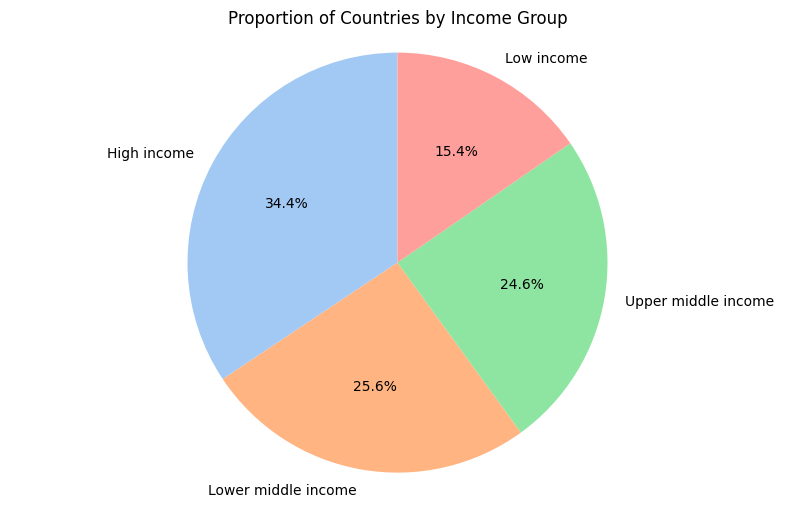

In [41]:
incomeGroup = internet['Income Group'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(incomeGroup, labels=incomeGroup.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Countries by Income Group')
plt.axis('equal') 
plt.show()

<h1>Task 10: Correlation Between Birth Rate and Internet Usage </h1>

In [39]:
internetcorr = internet['Birth rate'].corr(internet['Internet users'])
internetcorr

np.float64(-0.8155885551284765)

<h2>Insights for task 10: There is no correlation between Birth Rate and Internet usage</h2>